In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import keras as kr
import sklearn
import math
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

import itertools
import warnings
warnings.filterwarnings('ignore')

In [52]:
data = pd.read_csv('data1.csv')

In [53]:
data

,Date,reg_num
0,3/15/2019,30
1,3/16/2019,32
2,3/17/2019,50
3,3/18/2019,20
4,3/19/2019,200
5,3/20/2019,120
6,3/21/2019,70
7,3/22/2019,180
8,3/23/2019,65
9,3/24/2019,96


In [54]:
data.set_index('Date', inplace = True)

In [55]:
data1 = data.transpose()
data1

Date,3/15/2019,3/16/2019,3/17/2019,3/18/2019,3/19/2019,3/20/2019,3/21/2019,3/22/2019,3/23/2019,3/24/2019,...,3/26/2019,3/27/2019,3/28/2019,3/29/2019,3/30/2019,3/31/2019,4/1/2019,4/2/2019,4/3/2019,4/4/2019
reg_num,30,32,50,20,200,120,70,180,65,96,...,275,130,36,156,78,0,45,156,134,89


In [65]:
dates = pd.date_range(start = '2019-03-15', freq = 'D', periods = len(data1.columns)*1)
dates

DatetimeIndex(['2019-03-15', '2019-03-16', '2019-03-17', '2019-03-18',
               '2019-03-19', '2019-03-20', '2019-03-21', '2019-03-22',
               '2019-03-23', '2019-03-24', '2019-03-25', '2019-03-26',
               '2019-03-27', '2019-03-28', '2019-03-29', '2019-03-30',
               '2019-03-31', '2019-04-01', '2019-04-02', '2019-04-03',
               '2019-04-04'],
              dtype='datetime64[ns]', freq='D')

In [66]:
data_np = data1.transpose().as_matrix()

In [67]:
shape = data_np.shape
shape

(21, 1)

In [68]:
data_np

array([[ 30],
       [ 32],
       [ 50],
       [ 20],
       [200],
       [120],
       [ 70],
       [180],
       [ 65],
       [ 96],
       [148],
       [275],
       [130],
       [ 36],
       [156],
       [ 78],
       [  0],
       [ 45],
       [156],
       [134],
       [ 89]], dtype=int64)

In [69]:
shape[1]

1

In [70]:
data_np = data_np.reshape((shape[0] * shape[1], 1))

In [71]:
data_np.shape

(21, 1)

In [72]:
df = pd.DataFrame({'Mean' : data_np[:,0]})
df.set_index(dates, inplace = True)

In [73]:
df.head()

,Mean
2019-03-15,30
2019-03-16,32
2019-03-17,50
2019-03-18,20
2019-03-19,200


Text(0, 0.5, 'Mean across Day')

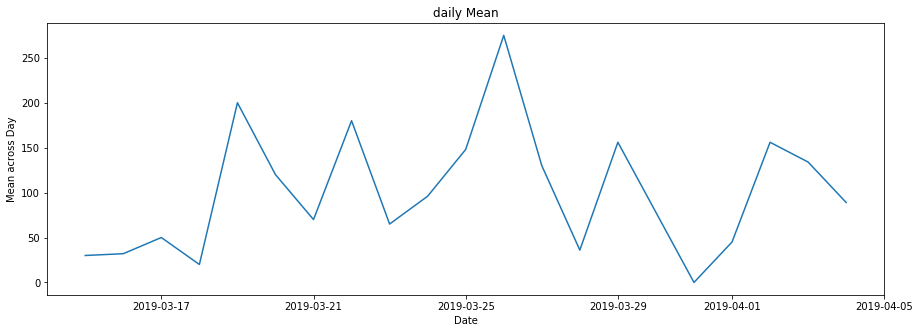

In [75]:
plt.figure(figsize = (15,5))
plt.plot(df.index, df['Mean'])
plt.title('daily Mean')
plt.xlabel('Date')
plt.ylabel('Mean across Day')

In [76]:
dataset = df.values

In [77]:
train = dataset[0:15,:]
test = dataset[15:,:]

In [78]:
print("Original data shape:",dataset.shape)
print("Train shape:",train.shape)
print("Test shape:",test.shape)

Original data shape: (21, 1)
Train shape: (15, 1)
Test shape: (6, 1)


In [79]:
# Converting the data into MinMax Scaler because to avoid any outliers present in our dataset
scaler = MinMaxScaler(feature_range = (0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data.shape

(21, 1)

In [107]:
x_train, y_train = [], []
for i in range(5,len(train)):
    x_train.append(scaled_data[i-5:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

In [108]:
#x_train shape
x_train.shape

(10, 5)

In [109]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [110]:
x_train.shape

(10, 5, 1)

In [113]:
 # Creating and fitting the model

model = Sequential()
model.add(LSTM(units = 6, return_sequences = True, input_shape = (x_train.shape[1],1)))
model.add(LSTM(units = 6))
model.add(Dense(1))

In [114]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam')
model.fit(x_train, y_train, epochs=10, batch_size = 1, verbose = 2)

Epoch 1/10
 - 2s - loss: 0.3283
Epoch 2/10
 - 0s - loss: 0.2813
Epoch 3/10
 - 0s - loss: 0.2415
Epoch 4/10
 - 0s - loss: 0.2088
Epoch 5/10
 - 0s - loss: 0.1731
Epoch 6/10
 - 0s - loss: 0.1390
Epoch 7/10
 - 0s - loss: 0.1122
Epoch 8/10
 - 0s - loss: 0.0900
Epoch 9/10
 - 0s - loss: 0.0728
Epoch 10/10
 - 0s - loss: 0.0604


In [116]:
# Now Let's perform same operations that are done on train set
inputs = df[len(df) - len(test) - 5:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [117]:
X_test = []
for i in range(5,inputs.shape[0]):
    X_test.append(inputs[i-5:i,0])
X_test = np.array(X_test)

In [118]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
Mean = model.predict(X_test)
Mean1 = scaler.inverse_transform(Mean)

In [119]:
rms=np.sqrt(np.mean(np.power((test-Mean1),2)))
rms

61.33183953681089

Text(0.5, 1.0, 'Forecasting on Actual data')

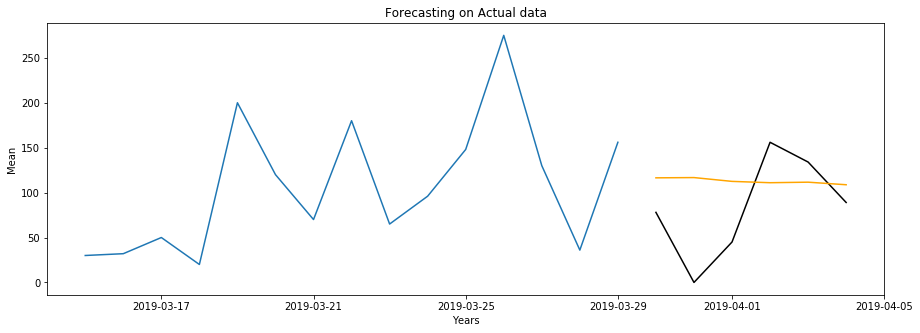

In [120]:
#plotting the train, test and forecast data
train = df[:15]
test = df[15:]
test['Predictions'] = Mean1

plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.title('Forecasting on Actual data')

In [121]:
trainpred = model.predict(X_test,steps=2)

In [122]:
trainpred.shape

(12, 1)

In [123]:
pred = scaler.inverse_transform(trainpred)

In [124]:
pred[0:24] 

array([[116.42482],
       [116.71229],
       [112.48415],
       [110.99491],
       [111.59114],
       [108.7387 ],
       [116.42482],
       [116.71229],
       [112.48415],
       [110.99491],
       [111.59114],
       [108.7387 ]], dtype=float32)

In [125]:
test.head()

,Mean,Predictions
2019-03-30,78,116.424820
2019-03-31,0,116.712288
2019-04-01,45,112.484154
2019-04-02,156,110.994911
2019-04-03,134,111.591141


In [149]:
testScore = math.sqrt(mean_squared_error(test['Mean'], trainpred[:6,0]))
print('Accuracy Score: %.2f' % (testScore))

Accuracy Score: 98.25


In [136]:
dates1 = pd.date_range(start = '2019-03-30', freq = 'D', end = '2019-04-10')
dates1

DatetimeIndex(['2019-03-30', '2019-03-31', '2019-04-01', '2019-04-02',
               '2019-04-03', '2019-04-04', '2019-04-05', '2019-04-06',
               '2019-04-07', '2019-04-08', '2019-04-09', '2019-04-10'],
              dtype='datetime64[ns]', freq='D')

In [137]:
new_df = pd.DataFrame({'Predicted_values':pred[:,0]})

In [138]:
new_df.set_index(dates1, inplace = True)

In [141]:
new_df

,Predicted_values
2019-03-30,116.424820
2019-03-31,116.712288
2019-04-01,112.484154
2019-04-02,110.994911
2019-04-03,111.591141
2019-04-04,108.738701
2019-04-05,116.424820
2019-04-06,116.712288
2019-04-07,112.484154
2019-04-08,110.994911


Text(0.5, 1.0, 'Forecasting on Actual data')

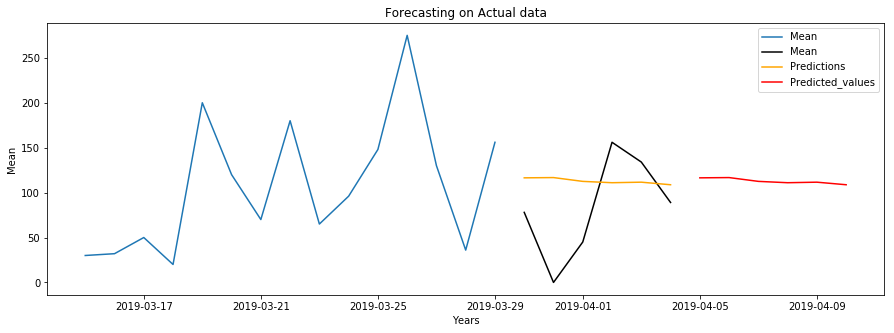

In [142]:
plt.figure(figsize=(15,5))
plt.plot(train['Mean'])
plt.plot(test['Mean'], color = 'black')
plt.plot(test['Predictions'], color = 'orange')
plt.plot(new_df['Predicted_values'][6:], color = 'red')
plt.xlabel('Years')
plt.ylabel('Mean')
plt.legend(loc = True)
plt.title('Forecasting on Actual data')